In [36]:
import numpy as np
import matplotlib.pyplot as plt

#### Матричное произведение $ C=AB $

In [37]:
def matmul(a, b):
    m = a.shape[0]
    n = a.shape[1]
    k = b.shape[1]
    c = np.empty((m, k))
    for i in range(m):
        for j in range(k):
            value = 0
            for l in range(n):
                value += a[i, l] * b[l, j]
            c[i, j] = value
    return c

In [38]:
m, n, k = 4, 3, 5
# генерация матриц с произвольными значениями
A = np.random.randint(m*n, size=(m, n))
B = np.random.randint(k*n, size=(n, k))
print(f"A:\n {A}")
print(f"B:\n {B}")
print(f"matmul(A, B):\n {matmul(A, B)}")
print(f"np.matmul(A, B):\n {np.matmul(A, B)}")

A:
 [[ 9 11  4]
 [ 1  6  7]
 [ 4  7  2]
 [ 3 11  3]]
B:
 [[ 1  9  6  8  9]
 [ 6 13  5 14  7]
 [ 9  1 14  1  2]]
matmul(A, B):
 [[111. 228. 165. 230. 166.]
 [100.  94. 134.  99.  65.]
 [ 64. 129.  87. 132.  89.]
 [ 96. 173. 115. 181. 110.]]
np.matmul(A, B):
 [[111 228 165 230 166]
 [100  94 134  99  65]
 [ 64 129  87 132  89]
 [ 96 173 115 181 110]]


In [39]:
np.matmul(A, B)

array([[111, 228, 165, 230, 166],
       [100,  94, 134,  99,  65],
       [ 64, 129,  87, 132,  89],
       [ 96, 173, 115, 181, 110]])

#### Скалярное произведение векторов $ c = ab $

In [40]:
r1 = np.array([1, 2, 3])
r2 = np.array([4, 5, 6])

def dot(a, b):
    value = 0
    for i in range(len(a)):
        value += a[i]*b[i]
    return value

dot(r1, r2)

32

In [41]:
np.dot(r1, r2)

32

#### Обратная матрица
Для квадратной матрицы $A$ существует обратная (inverse) матрица $A^{-1}$ если она является невырожденной (nonsingular) ($ AA^{-1} = I $). Так же такую матрицу называют обратимой (invertible).

In [42]:
n = 3
A = np.random.randint(n*n, size=(n, n))     # матрица n x n коэффициентов 
print(f'det(A) = {np.linalg.det(A)}')       # детерминант матрицы
iA = np.linalg.inv(A)
print('A:\n', A)
print('iA:\n', iA)

det(A) = -7.999999999999988
A:
 [[5 6 4]
 [4 0 4]
 [6 8 5]]
iA:
 [[ 4.    -0.25  -3.   ]
 [-0.5   -0.125  0.5  ]
 [-4.     0.5    3.   ]]


#### Транспонирование матрицы (transpose)

In [43]:
m, n = 4, 3
A = np.random.randint(m*n, size=(m, n))

def transpose(M):
    tM = np.empty((M.shape[1], M.shape[0]), dtype=M.dtype)
    for i in range(M.shape[1]):
        for j in range(M.shape[0]):
            tM[i, j] = M[j, i]
    return tM

tA = transpose(A)
print('original:\n', A)
print('transposed:\n', tA)


original:
 [[ 0  8 10]
 [ 5  0  9]
 [ 0  2  7]
 [ 8  9  8]]
transposed:
 [[ 0  5  0  8]
 [ 8  0  2  9]
 [10  9  7  8]]


In [44]:
tA = np.transpose(A)    # два           # фцнкция
tA = A.transpose()      # способа       # метод
print(tA)

[[ 0  5  0  8]
 [ 8  0  2  9]
 [10  9  7  8]]


#### Диагональная матрица (diagonal matrix)

In [45]:
np.diag([i for i in range(7)])

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 5, 0],
       [0, 0, 0, 0, 0, 0, 6]])

#### Матрица перестановки (permutation matrix)
Матрица перестановки имеет в каждой строке и столбце ровно по одной единице, а на всех прочих местах располагаются нули. Такая матрица называется матрицей перестановки, потому что умножение матрицы перестановки на вектор приводит к перестановке элементов вектора. Умножение матрицы перестановки P на матрицy A (той же размерности), образует матрицу A с переставленными строками, а произведение AP образует матрицу A с переставленными колонками.

In [46]:
P = np.array([  [0, 0, 1, 0],
                [1, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 1, 0, 0]   ])

print(np.linalg.det(P))
v = np.array([1,2,3,4])
np.matmul(P, v)

-1.0


array([3, 1, 4, 2])

In [47]:
n = 4
A = np.arange(16).reshape(4, 4)
print('A:\n', A)

PA = np.matmul(P, A)
AP = np.matmul(A, P)

print('PA: переставлены строки\n', PA)
print('AP: переставлены колонки\n', AP)


A:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
PA: переставлены строки
 [[ 8  9 10 11]
 [ 0  1  2  3]
 [12 13 14 15]
 [ 4  5  6  7]]
AP: переставлены колонки
 [[ 1  3  0  2]
 [ 5  7  4  6]
 [ 9 11  8 10]
 [13 15 12 14]]


In [48]:
A = np.random.randint(1, 6, size=(3, 3))
A

array([[1, 3, 4],
       [1, 5, 2],
       [5, 5, 3]])

#### Моделирование задачи через систему уравнений

Компания производит продукты $ N_1, \ldots ,N_n $, для которых требуются ресурсы $ R_1, \ldots ,R_m $. Для производства одного изделия продукта $ N_j $ требуется $ a_{ij} $ единиц ресурса $ R_i $, где $ i=1, \ldots ,m; j=1, \ldots ,n $. Цель заключается в нахождении оптимального производственного плана: имеется в распоряжении $ b_i $ единиц ресурса $ R_i $, сколько единиц $ x_j $ продукта $ N_j $ следует произвести, чтобы исчерпались все ресурсы?
Если мы производим $ x_1, \ldots  , x_n $ единиц соответствующих продуктов, то суммарное количество требуемых ресурсов будет равно $$ a_{i1}x_1+ \cdots +a_{in}x_n $$ Как мимимум, эта сумма должна быть меньше, чем, чем доступное количество $ b_i $ ресурса $ R_i $, а в соответствии с нашим условием, $$ \sum_{j=1}^n a_{ij}x_j= d_i $$ Так, образуется $m$ строк, каждая из которых соответствует $i$-му ресурсу:
$$ a_{11} x_1 + \cdots + a_{1n} x_n = b_1 $$
$$ \vdots $$ 
$$ a_{m1} x_1 + \cdots + a_{mn} x_n = b_m $$
Решение $ (x_1, \ldots, x_n) \in \mathbb{R}^n $ этой системы уравнений будет представлять оптимальный производственный план, показыающий, сколько единиц каждого из продуктов следует производить, для того, чтобы задействовать имеющиеся ресурсы без отходов.

Рассмотрим простейший случай, когда производится два продукта $ N_1, N_2 $, и используется два ресурса $ R_1, R_2 $. В этом случае система линейных уравнений
$$ a_{11} x_1 + a_{12} x_2 = b_1 $$
$$ a_{21} x_1 + a_{22} x_2 = b_2 $$
Определим некоторые значения для матрицы коэффициентов $ a_{ij} $ и вектора свободных членов $ b_i $ и построим соответствующие прямые

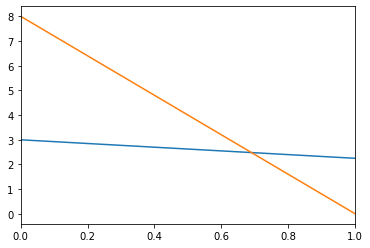

In [49]:
A = np.array([
    [1.5, 2],
    [4, 0.5]
])
B = np.array([6, 4])

# построем прямые по парам точек
# пусть значениями x1 будут 0 и 1:
x1_1 = 0
x1_2 = 1
x1_pair = (x1_1, x1_2)
# значение x2 при x1 = -10:
x2_1 = (B[0] - (A[0, 0] * x1_1)) / A[0, 1]
# значение x2 при x1 = 5:
x2_2 = (B[0] - (A[0, 0] * x1_2)) / A[0, 1]

x2_pair = (x2_1, x2_2)

plt.xlim(x1_1, x1_2)
plt.plot(x1_pair, x2_pair)

# так же строим график второго уравнения
x2_1 = (B[1] - (A[1, 0] * x1_1)) / A[1, 1]
x2_2 = (B[1] - (A[1, 0] * x1_2)) / A[1, 1]
x2_pair = (x2_1, x2_2)
plt.plot(x1_pair, x2_pair)

Если значения $ x_1, x_2 $ таковы, что $ a_{11}x_1 + a_{12}x_2 < b_1$, то образуется излишек ресурса $R_1$, и в этом случае точка $ (x_1, x_2) $ будет располагаться ниже оранжевой прямой. Также если $ a_{21}x_1 + a_{22}x_2 < b_2$, то образуется излишек ресурса $R_2$, и в этом случае точка $ (x_1, x_2) $ будет располагаться ниже синей прямой.
Полное исчерпание ресурсов происходит только при том условии, если точка $ (x_1, x_2) $ лежит как на оранжевой, так и на синей прямой, что соответствует решению данной системы уравнений.

Решим систему уравнений методом Крамера

In [50]:
import copy

A1 = copy.deepcopy(A)
A2 = copy.deepcopy(A)

A1[:, 0] = B    # замена первой колонки матрицы A на вектор b
A2[:, 1] = B    # замена второй колонки матрицы A на вектор b
print(f"{A}\n{A1}\n{A2}")

D =  np.linalg.det(A)       # вычисление определителей
D1 = np.linalg.det(A1)      # при помощи функции det
D2 = np.linalg.det(A2)      # 
print(f"{D = :.3f} {D1 = :.3f} {D2 = :.3f}")

x1 = D1 / D                 # решение системы
x2 = D2 / D                 # уравнений
print(f"{x1 = :.3f} {x2 = :.3f}")

[[1.5 2. ]
 [4.  0.5]]
[[6.  2. ]
 [4.  0.5]]
[[1.5 6. ]
 [4.  4. ]]
D = -7.250 D1 = -5.000 D2 = -18.000
x1 = 0.690 x2 = 2.483


СЛАУ можно решить методом Гаусса (Gaussian elimination). Путем элементарных преобразований матрица коэффициентов $A$ приводится к верхне-треугольной (upper triangular) матрице. Эти преобразования параллельно совершаются и над вектором свободных членов $b$. После этого значения переменных $x_i$ вычисляются с конца (с последней строки).

#### Функция `solve` из numpy и scipy для решения СЛАУ

In [51]:
from scipy import linalg
import numpy as np

A = np.array([                              # матрица коэффициентов
    [-6, 4, 3],
    [6, -12, 3],
    [3, 8, -12]])

b = np.array([3, 4, 12])                    # вектор свободных членов

print(np.linalg.solve(A, b))
print(linalg.solve(A, b))

[-8.5        -6.4375     -7.41666667]
[-8.5        -6.4375     -7.41666667]


#### PLU-decomposition

PLU-разложение представляет матрицу $A$ в виде произведения $ A=PLU $, где<br>
$P$ - матрица перестановок (premutation matrix)<br>
$L$ - нижне-треугольная матрица (lower-triangular matrix)<br>
$U$ - верхне-треугольная матрица (upper-triangular matrix)<br>
Всякая невырожденная матрица допускает такое разложение.<br>
Функция `lu` производит такое разложение, и возвращает соответствующие матрицы.

In [52]:
from scipy.linalg import lu

A = np.array([
    [-6, 4, 3, 12],
    [6, -12, 3, 9],
    [3, 8, -12, 6],
])

P, L, U = lu(A)     # decomposition

print(f"P:\n {P}")
print(f"L:\n {L}")
print(f"U:\n {U}")

# матричное произведение PLU дает исходную матрицу A:
A_composed = np.matmul(P, np.matmul(L, U))
print(f"A = PLU:\n {A_composed}")

P:
 [[1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
L:
 [[ 1.   0.   0. ]
 [-0.5  1.   0. ]
 [-1.  -0.8  1. ]]
U:
 [[ -6.    4.    3.   12. ]
 [  0.   10.  -10.5  12. ]
 [  0.    0.   -2.4  30.6]]
A = PLU:
 [[ -6.   4.   3.  12.]
 [  6. -12.   3.   9.]
 [  3.   8. -12.   6.]]


#### Решение СЛАУ при помощи PLU-разложения

Пусть СЛАУ задана квадратной матрицей $A$ и вектором $b$. Тогда систему уравнений можно записать в виде $Ax=b$. Если матрица $A$ невырожденная, то вычислив обратную матрицу $A^{-1}$, можно получить решение умножив $A^{-1}$ на $b$, так как $x=A^{-1}b$. На практике этого подхода избегают из-за его численной неустойчивости (нарастание ошибок округления).<br>
Подход с PLU-разложением численно устойчаив, и на практике оказывается более быстрым. Преимущество основано на том, что СЛАУ решается гораздо легче, если ее матрица треугольна, что и выполняется в случае матриц L и P. В соответствии с PLU-разложением, $A = PLU$. Тогда система уравнений запишется в виде $$PLUx = b$$ Для нахождения решения $x$ исходной системы, мы решим для начала систему $Py = b$, где $y=LUx$, затем систему $Lz=y$, где $z=Ux$, и наконец систему $Ux=z$.

In [53]:
from scipy.linalg import lu, solve

A = np.array([                              # матрица коэффициентов
    [-6, 4, 3],
    [6, -12, 3],
    [3, 8, -12]])

b = np.array([3, 4, 12])                    # вектор свободных членов

P, L, U = lu(A)
y = solve(P, b)
z = solve(L, y)
x = solve(U, z)
print(x)

print(solve(A, b))

[-8.5        -6.4375     -7.41666667]
[-8.5        -6.4375     -7.41666667]


#### Ранг матрицы

In [54]:
A = np.random.randint(0, 16, size=(4, 4))
A[1] = A[2] * 3     # добавим линейную зависимость
print(A)
rank = np.linalg.matrix_rank(A)
print(f"{rank = }")

[[ 5  0  4  1]
 [ 3 30 36 45]
 [ 1 10 12 15]
 [ 2  0 10 13]]
rank = 3


In [56]:
A = np.random.randint(0, 16, size=(4, 4))
A[:, 3] = 0
print(A)
B = np.array([0, 0, 0, 0])
np.linalg.solve(A, B)

[[ 1  5  4  0]
 [ 1 13  7  0]
 [14  7 14  0]
 [15  9 13  0]]


LinAlgError: Singular matrix

In [57]:
delta1 = 0.0000000000000002
delta2 = 5 * 10**-16
print(delta1)
print(delta2)

2e-16
5e-16


#### Линейная зависимость и коллинеарность двух векторов

In [58]:
def vectorCos(a, b):
    """ a, b: vectors
    return: косинус угла между векторами
    """
    assert len(a) == len(b), 'vectors have different sizes'
    aNorm = np.sqrt(np.sum(a ** 2))
    bNorm = np.sqrt(np.sum(b ** 2))
    return np.dot(a, b) / (aNorm * bNorm)


def isCollinear(a, b):
    """ a, b: vectors
    return: True, если векторы коллинеарны и False в противном случае
    """
    cos = vectorCos(a, b)
    # с ростом размерности растет ожидаемая погрешность
    delta = 2 * np.log10(len(a)) * 10**-15
    
    if np.abs(cos - 1) < delta:
        return True
    else:
        return False


def isDependent(a, b):
    """ a, b: vectors
    return: True, если векторы линейно зависимы и False в противном случае
    """
    assert len(a) == len(b), 'vectors have different sizes'
    # если хотя бы один из векторов является нулевым, то
    # векторы являются линейно зависимыми
    if np.sum(a**2) == 0 or np.sum(b**2) == 0:
        return True

    value = None
    for i in range(0, len(a)):
        if b[i] == 0 and a[i] != 0:
            return False
        elif b[i] != 0:
            if value is None:
                value = a[i] / b[i]
            elif a[i] / b[i] != value:
                return False
    return True

In [59]:
# создадим заведомо коллинеарные (линейно зависимые векторы):
a = np.array([np.random.uniform(-100, 100) for i in range(10)])
b = a * 1000

print(vectorCos(a, b))
print(isCollinear(a, b))
print(isDependent(a, b))

0.9999999999999998
True
False


Здесь возникает интересный момент. Если несколько раз запускать предыдущую ячейку, можно заметить, что несмотря на заведомую линейную зависимость векторов, функция `isDependent` часто выдает `False`. Это связанно с тем, что множество арифметических операций с числами float накапливает погрешности, и в результате сравнение двух теоретически одинаковых чисел возвращает `False`. Синус угла между коллинеарными векторами равен ровно 1. Однако можно заметить, что расчитанная величина может отличаться от 1. В функции `isCollinear` учтен этот момент и такие мелкие колебания относительно 1 не влияют на результат.

In [ ]:
# Тестирование накопления численных погрешностей:

X = []
samples = 50000
for i in range(samples):
    print(f"\r {100 * i / samples :.1f} %", end='')
    a = np.array([np.random.uniform(-100, 100) for i in range(3)])
    b = a * 1000
    X.append(vectorCos(a, b))
    if isCollinear(a, b) is False:
        print("error")

print(f"\rdelta = {2 * np.log10(len(a)) * 10**-15}")
print(f"{max(X) - 1 = }")
print(f"{1 - min(X) = }")

 22.0 %

KeyboardInterrupt: 

Еще один способ выяснить, является ли пара векторов (и даже произвольное множество векторов) линейно зависимой. Составляется матрица из векторов и вычисляется ранг матрицы. Если ранг меньше количества векторов, значит вектора линейно зависимы.

In [ ]:
# создадим линейно независимые векторы
a = np.array([2, 4, 5, 6, 7, 8])
b = np.array([1, 2, 3, 4, 5, 6])
c = np.array([0, 3, 4, 4, 3, 2])

M = np.vstack((a, b, c))
print(np.linalg.matrix_rank(M))

# сделам a и b линейно зависимыми
b = a * 3

M = np.vstack((a, b, c))
print(np.linalg.matrix_rank(M))